In [ ]:
pip install xgboost

In [1]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import common
import matplotlib.pyplot as plt

In [139]:
# nba = common.get_cleaned_baseline_data('./data/cleaned_data/base_cleaned.csv')
nba = pd.read_csv('./data/cleaned_data/external_cleaned.csv')

nba = nba.dropna()
nba = nba.loc[:, (nba != 0).any(axis=0)]
nba = common.add_log_y_values(nba)
# nba['inflationAdjSalary_log'] = nba['salary'].apply(lambda x: np.log(x))
nba = nba.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'college','archetype','all_star','all_nba', 'position','team','inflationAdjSalary','salary'])
# nba = nba.drop(columns=['all_star_total'])
nba
# y=nba[:,-1]

,playerName,seasonStartYear,startYear,height,weight,MP,PTS,Age,games,games_started,...,conference_champ,mvp,mvp_rank,mvp_total,player_week_enc,player_week_total,dpoy,dpoy_rank,dpoy_total,inflationAdjSalary_log
18,Anfernee Hardaway,1996,1994.0,79.0,195.0,3015.0,1780.0,24.0,82.0,82.0,...,0,0,3,0,0,0,0,100000,0,16.261230
43,Glen Rice,1996,1990.0,80.0,215.0,3142.0,1710.0,28.0,79.0,79.0,...,0,0,100000,0,0,1,0,100000,0,15.752655
53,Vin Baker,1996,1994.0,83.0,232.0,3319.0,1729.0,24.0,82.0,82.0,...,0,0,100000,0,0,0,0,100000,0,15.691609
82,Patrick Ewing,1996,1986.0,84.0,240.0,2783.0,1711.0,33.0,76.0,76.0,...,0,0,100000,0,0,11,0,100000,0,15.464473
94,Anthony Mason,1996,1990.0,79.0,250.0,3457.0,1196.0,29.0,82.0,82.0,...,0,0,100000,0,0,0,0,100000,0,15.387232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,Victor Oladipo,2017,2014.0,76.0,213.0,2222.0,1067.0,24.0,67.0,67.0,...,0,0,100000,0,2,2,0,100000,0,16.963642
9948,Paul George,2017,2011.0,80.0,220.0,2689.0,1775.0,26.0,75.0,75.0,...,0,0,100000,0,1,5,0,100000,0,16.879225
9952,Jimmy Butler,2017,2012.0,79.0,230.0,2809.0,1816.0,27.0,76.0,75.0,...,0,0,100000,0,2,4,0,100000,0,16.847479
10081,Karl-Anthony Towns,2017,2016.0,83.0,248.0,3030.0,2061.0,21.0,82.0,82.0,...,0,0,100000,0,2,3,0,100000,0,15.746381


In [140]:
X_train, X_test, y_train, y_test = common.split_data(nba)

In [141]:
feature_names = nba.columns.values.tolist()
feature_names.remove('playerName')
feature_names.remove('inflationAdjSalary_log')
feature_names

['seasonStartYear',
 'startYear',
 'height',
 'weight',
 'MP',
 'PTS',
 'Age',
 'games',
 'games_started',
 'PER',
 'FTr',
 'AST',
 'STL',
 'TRB',
 'FT',
 '3P',
 'FG',
 'all_star_total',
 'all_star_enc',
 'all_nba_enc',
 'all_nba_total',
 'draft_pick',
 'champion',
 'conference_champ',
 'mvp',
 'mvp_rank',
 'mvp_total',
 'player_week_enc',
 'player_week_total',
 'dpoy',
 'dpoy_rank',
 'dpoy_total']

In [142]:
# train_dmatrix = xg.DMatrix(data = X_train, label = y_train, feature_names=feature_names)
# test_dmatrix = xg.DMatrix(data = X_test, label = y_test, feature_names=feature_names)
  
# # Parameter dictionary specifying base learner
# param = {"objective":"reg:linear"}
  
# xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
# pred = xgb_r.predict(test_dmatrix)

xgb_r = xg.XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000, objective='reg:linear', booster='gbtree')
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE : % f" %(rmse))

MSE = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"MSE: {MSE}, R2: {r2}")

[13:37:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.560422
MSE: 0.31407284879918795, R2: -0.10061036172108073


In [111]:
feature_important = xgb_r.get_booster().get_score(importance_type='weight')
feature_important
# keys = list(feature_important.keys())
# values = list(feature_important.values())

# data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
# data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

{'f0': 186.0,
 'f1': 179.0,
 'f2': 83.0,
 'f3': 67.0,
 'f4': 144.0,
 'f5': 163.0,
 'f6': 138.0,
 'f7': 61.0,
 'f8': 23.0,
 'f9': 284.0,
 'f10': 166.0,
 'f11': 95.0,
 'f12': 134.0,
 'f13': 204.0,
 'f14': 56.0,
 'f15': 204.0,
 'f16': 89.0,
 'f17': 61.0,
 'f18': 25.0,
 'f19': 63.0,
 'f20': 90.0,
 'f24': 58.0,
 'f26': 23.0,
 'f27': 69.0,
 'f29': 62.0}

<AxesSubplot: >

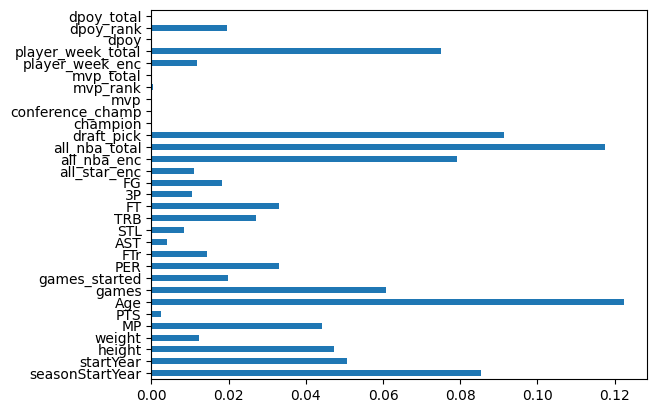

In [113]:
Predictors=['seasonStartYear','startYear','height','weight','MP','PTS','Age','games','games_started','PER','FTr','AST','STL','TRB','FT','3P','FG','all_star_total','all_star_enc','all_nba_enc','all_nba_total','draft_pick','champion','conference_champ','mvp','mvp_rank','mvp_total','player_week_enc','player_week_total','dpoy','dpoy_rank','dpoy_total']
feature_importances = pd.Series(xgb_r.feature_importances_, index=Predictors)
feature_importances.plot(kind='barh')